In [156]:
import numpy as np

x = list(np.random.random(31))
# x

In [219]:
np.random.seed(42)

x = list(np.random.random(31))

beta = 0.2
gamma=0.1
for t in range(30, 200000):
    if t%200==0:
        beta = beta*1.01
        gamma = gamma*1.001
    delta_x = beta*(x[t-30])/(1+(x[t-30])**10) - gamma*x[t]
    x.append(x[t] + delta_x+ np.random.random()+ np.random.random()+ np.random.random())

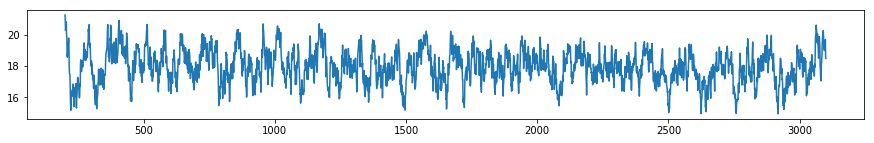

In [220]:
import matplotlib.pyplot as plt

k=100
plt.figure(figsize=(15,2))
plt.plot(range(100+k,3001+k) ,(np.array(x)+ np.random.random()+ np.random.random()+ np.random.random()+ np.random.random()+ np.random.random()*1)[100+k:3001+k])